<a href="https://colab.research.google.com/github/centralperkgithub/DailyDharma-Obesity-Pediction-Webapp/blob/main/DailyDharma2_Obesity_Level_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import collections
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

# **Loading and analyzing data**

In [ ]:
path_train = 'train.csv'
path_test = 'test.csv'

data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

In [ ]:
data_train.shape

(20758, 18)

In [ ]:
data_test.shape

(13840, 17)

In [ ]:
data_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
data_train.head(13840)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,13835,Female,19.637947,1.747714,128.148108,yes,yes,3.000000,3.000000,Sometimes,no,1.242832,no,0.485322,0.858392,Sometimes,Public_Transportation,Obesity_Type_III
13836,13836,Female,19.717249,1.531610,42.000000,no,no,2.000000,3.000000,Sometimes,no,1.000000,no,0.663896,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
13837,13837,Male,29.721964,1.910987,129.991623,yes,yes,2.195964,3.000000,Sometimes,no,1.509734,no,0.987521,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
13838,13838,Male,25.036269,1.757154,112.089022,yes,yes,1.108663,3.000000,Sometimes,no,2.000000,no,1.543961,1.098380,Sometimes,Public_Transportation,Obesity_Type_II


In [ ]:
data_train.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [ ]:
data_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
data_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
data_test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# counting number of missing values in the train set
df = pd.DataFrame(data_train)
missing_val_train = df.isnull().sum()

print("Missing values in data :")
print(missing_val_train[missing_val_train > 0])

Missing values in data :
Series([], dtype: int64)


In [ ]:
# counting number of missing values in the test set
df_test = pd.DataFrame(data_test)
missing_val_test = df_test.isnull().sum()

print("Missing values in data :")
print(missing_val_test[missing_val_test > 0])

Missing values in data :
Series([], dtype: int64)


In [ ]:
# Identifying numerical columns in train set
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
# Show unique values in categorical columns in train set
for column in categorical_cols:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Frequently' 'no' 'Always']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Unique values in 'NObeyesdad': ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [ ]:
# Identifying numerical columns in test set
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns in test set
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols_test)
print("Categorical Columns:", categorical_cols_test)

Numerical Columns: Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [ ]:

# Show unique values in categorical columns in test set
for column in categorical_cols_test:
    print(f"Unique values in '{column}': {df_test[column].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Always' 'Frequently' 'no']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently' 'Always']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


In [ ]:
# Identifying numerical columns in test set
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns in test set
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols_test)
print("Categorical Columns:", categorical_cols_test)

Numerical Columns: Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [ ]:
# Show unique values in categorical columns in test set
for column in categorical_cols_test:
    print(f"Unique values in '{column}': {df_test[column].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Always' 'Frequently' 'no']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently' 'Always']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


In [ ]:
# Replace categorical values with numerical values in the train set
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0})
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].replace({'yes': 1, 'no': 0})
df['CAEC'] = df['CAEC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df['CALC'] = df['CALC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df['MTRANS'] = df['MTRANS'].replace({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Bike': 3, 'Motorbike': 4})

# OneHot encoding the gender feature
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

# Joining the new one-hot encoded columns back to the original DataFrame
df = pd.concat([df, gender_dummies], axis=1)

# Drop the original columns
df.drop('Gender', axis=1, inplace=True)

In [ ]:
# Replace categorical values with numerical values in the test set
df_test['family_history_with_overweight'] = df_test['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df_test['FAVC'] = df_test['FAVC'].replace({'yes': 1, 'no': 0})
df_test['SMOKE'] = df_test['SMOKE'].replace({'yes': 1, 'no': 0})
df_test['SCC'] = df_test['SCC'].replace({'yes': 1, 'no': 0})
df_test['CAEC'] = df_test['CAEC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df_test['CALC'] = df_test['CALC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df_test['MTRANS'] = df_test['MTRANS'].replace({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Bike': 3, 'Motorbike': 4})

# OneHot encoding the gender feature
gender_dummies = pd.get_dummies(df_test['Gender'], prefix='Gender')

# Joining the new one-hot encoded columns back to the original DataFrame
df_test = pd.concat([df_test, gender_dummies], axis=1)

# Drop the original columns
df_test.drop('Gender', axis=1, inplace=True)

In [ ]:
df_test.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_Female,Gender_Male
0,20758,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,0,False,True
1,20759,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,0,True,False
2,20760,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,0,True,False
3,20761,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,0,False,True
4,20762,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,0,True,False


# **Exploratory Data Analysis (EDA)**

Text(0, 0.5, 'CALC')

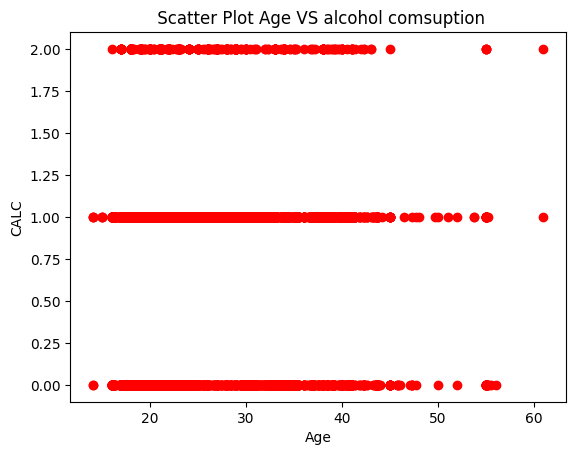

In [ ]:
plt.scatter(df['Age'],df['CALC'], c = 'red')
plt.title(' Scatter Plot Age VS alcohol comsuption')
plt.xlabel('Age')
plt.ylabel('CALC')

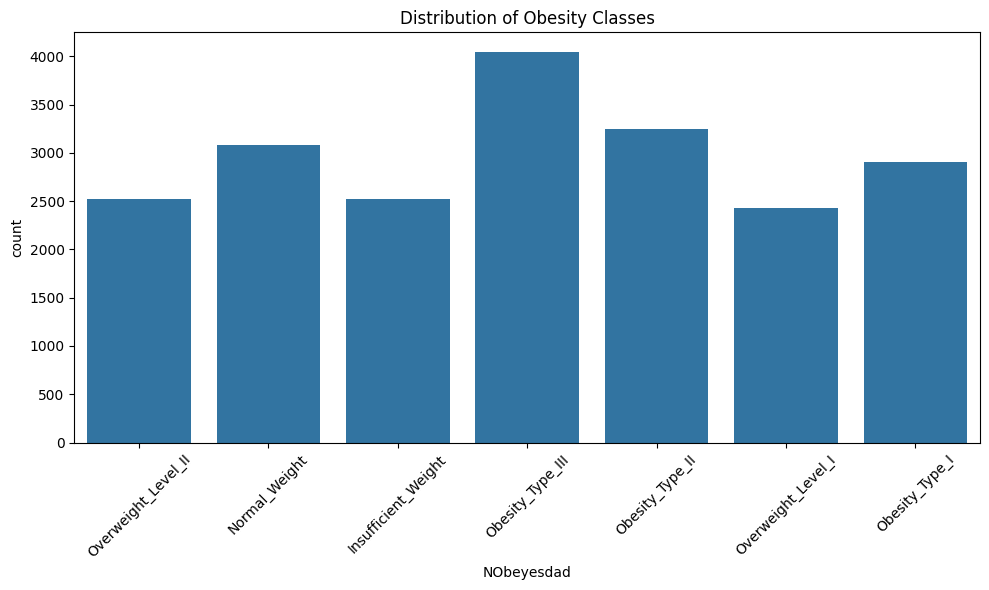

In [ ]:
# Count plot for the target variable 'NObeyesdad'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribution of Obesity Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

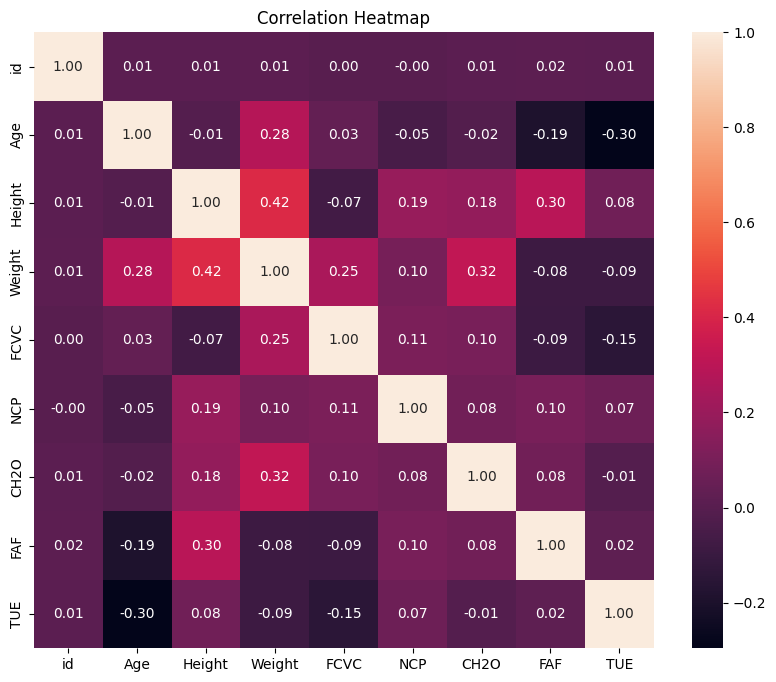

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **Obesity**

In [ ]:
c = Counter(df['NObeyesdad'])
print(c)

Counter({'Obesity_Type_III': 4046, 'Obesity_Type_II': 3248, 'Normal_Weight': 3082, 'Obesity_Type_I': 2910, 'Insufficient_Weight': 2523, 'Overweight_Level_II': 2522, 'Overweight_Level_I': 2427})


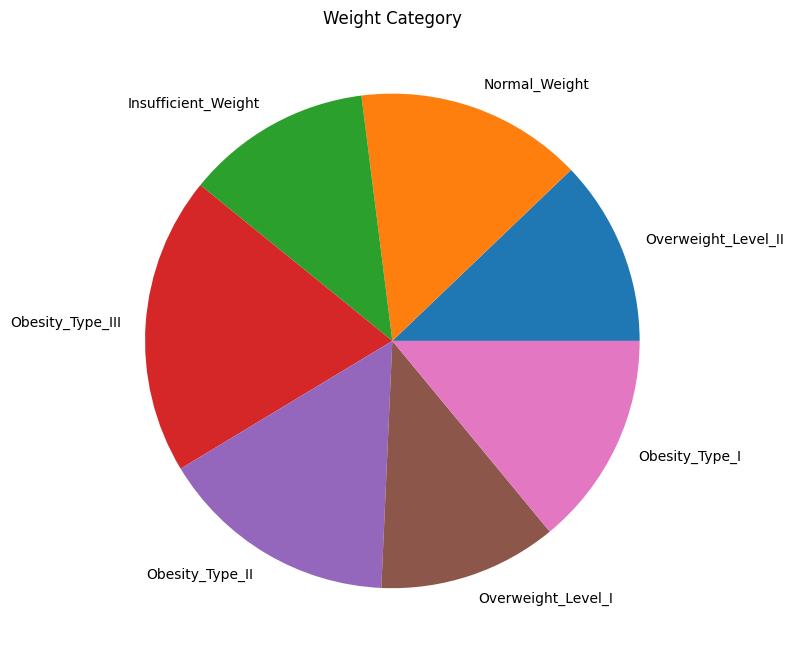

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

family_history_with_overweight [1, 0] [17014, 3744]
FAVC [1, 0] [18982, 1776]
FCVC [3.0, 2.0, 1.0, 2.9673, 2.766612, 2.938616, 2.9553, 2.57649, 2.819934, 2.225149, 2.630137, 1.428289, 2.919526, 2.938801, 2.971574, 2.341999, 2.927218, 2.722161, 2.499108, 2.95841, 2.927187, 2.81646, 2.442536, 2.499388, 1.826885, 2.636719, 2.219186, 1.99124, 2.568063, 2.919584, 2.918113, 1.031149, 2.724121, 1.99953, 2.21965, 2.392665, 2.971588, 2.927409, 2.959658, 2.913486, 1.994679, 2.204914, 2.002784, 2.720701, 2.967853, 2.92711, 2.939727, 2.823179, 2.765063, 2.911312, 2.95801, 2.871016, 2.490776, 1.924632, 1.063449, 2.312528, 2.714447, 1.123939, 1.851262, 2.880759, 1.570089, 2.195964, 2.591292, 1.451337, 2.045027, 2.19011, 1.397468, 2.913452, 2.05687, 2.633855, 2.44004, 2.746408, 2.744994, 1.005578, 2.652779, 2.85916, 2.944287, 1.754401, 2.336044, 1.947495, 2.945967, 2.175276, 2.964319, 2.57691, 2.906269, 2.640801, 2.739, 2.323351, 1.967061, 2.191108, 2.13683, 2.01695, 2.962415, 2.974006, 2.795086, 2.6

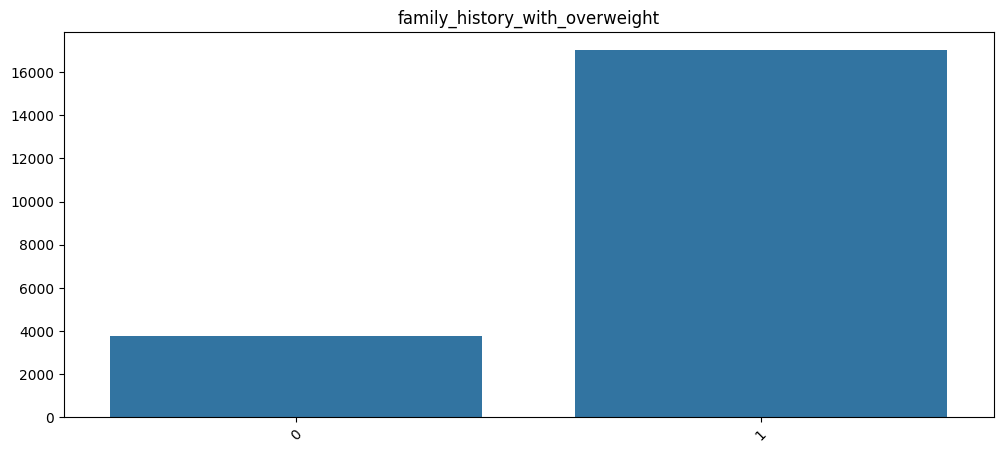

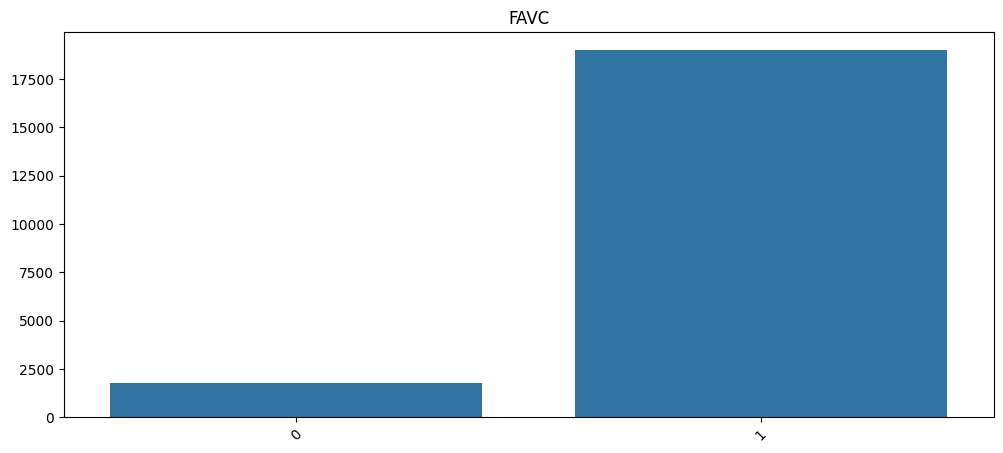

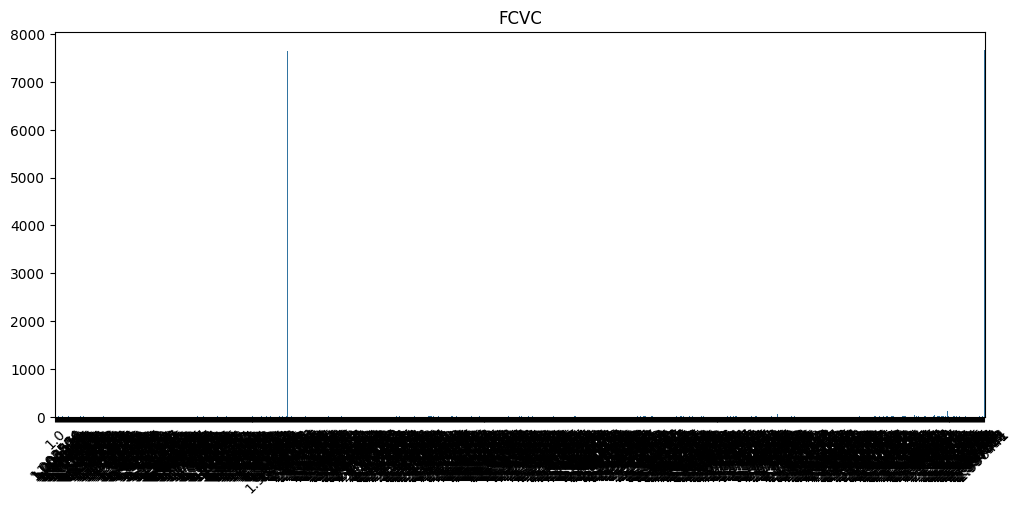

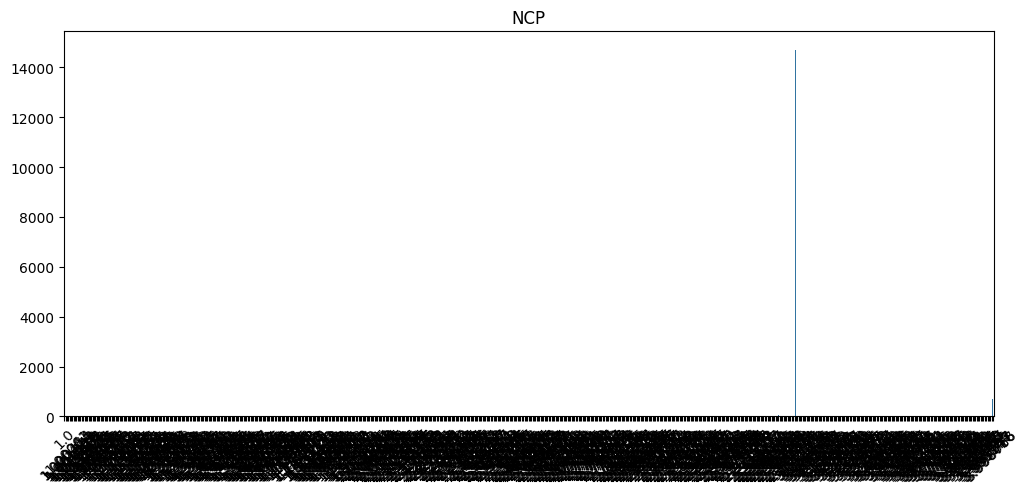

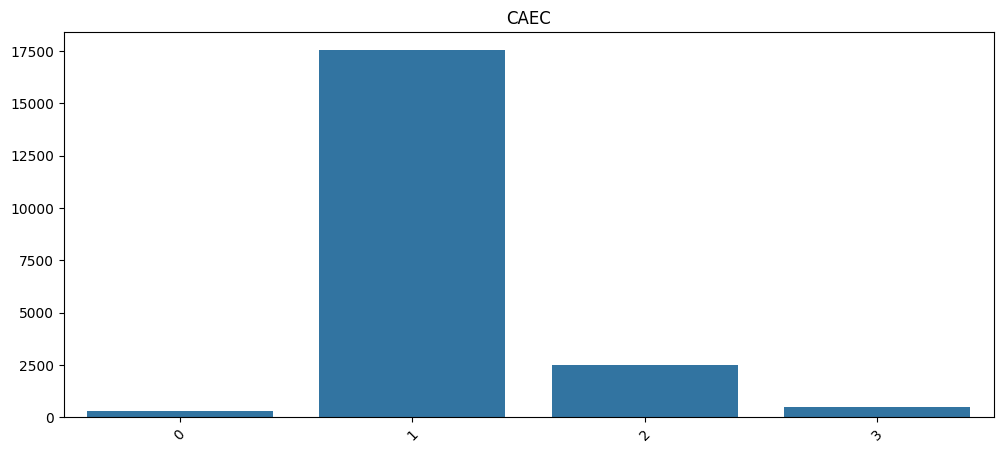

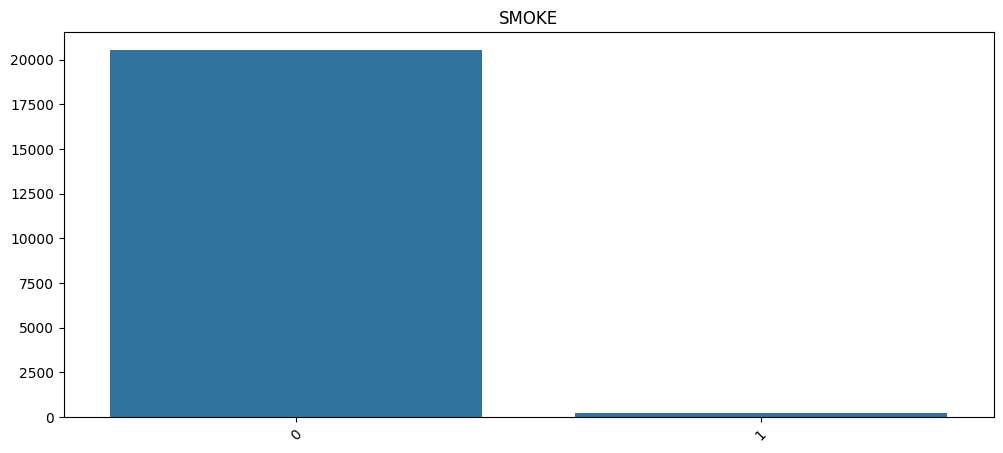

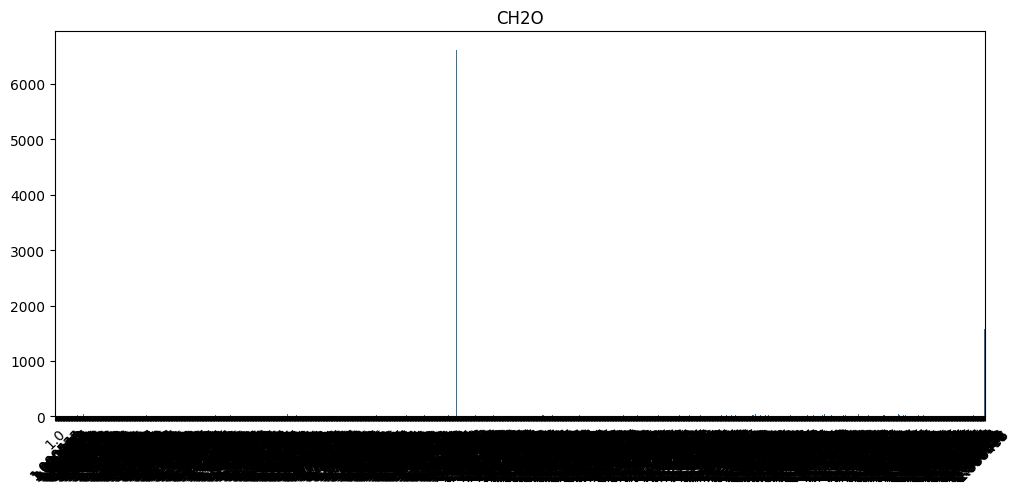

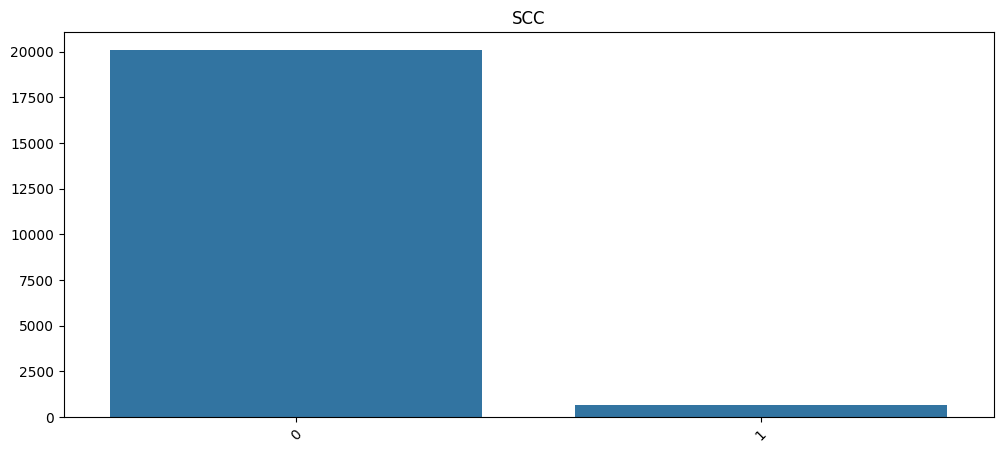

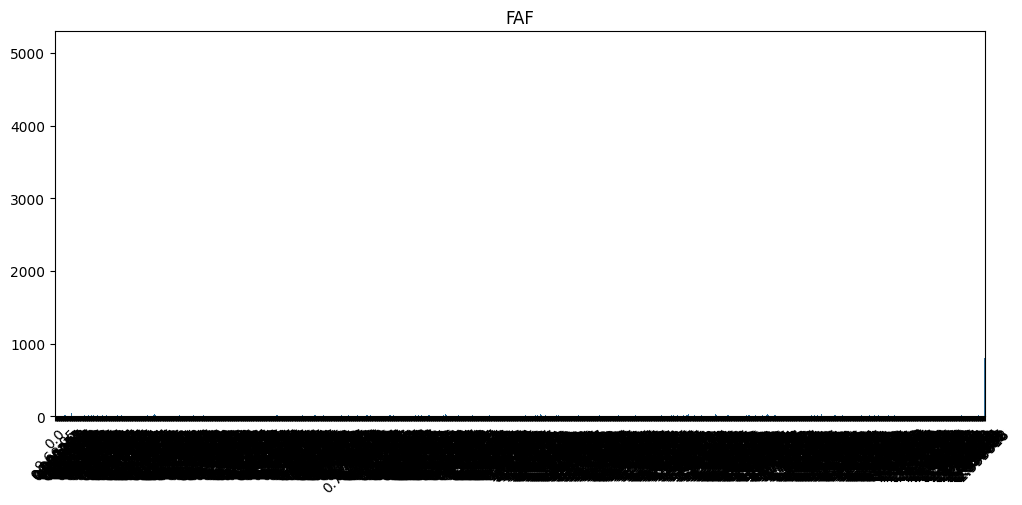

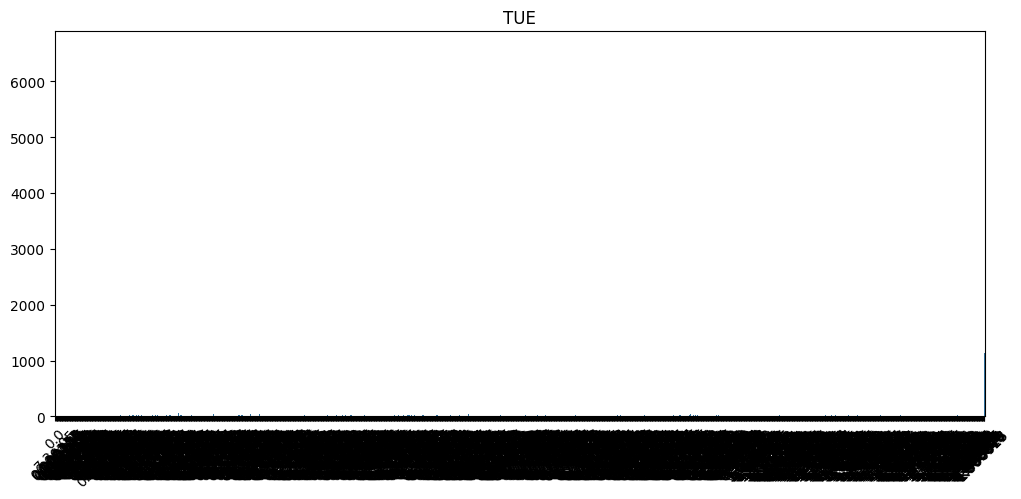

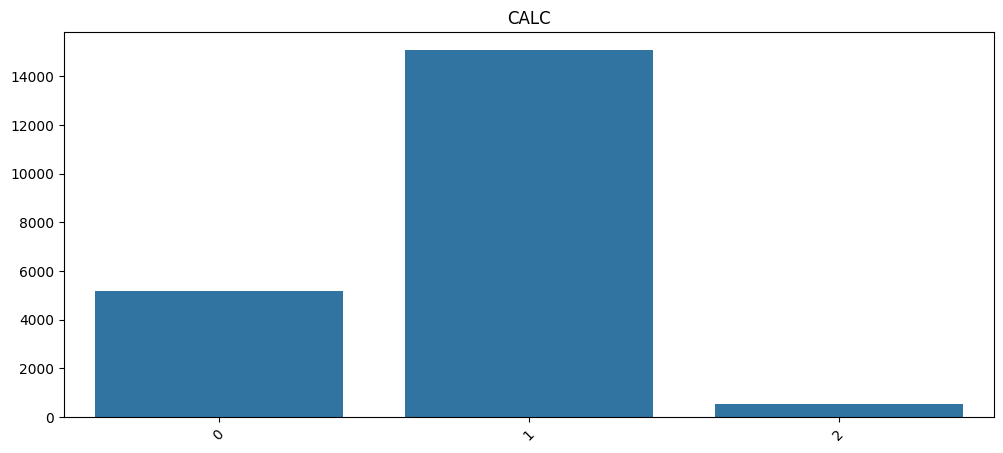

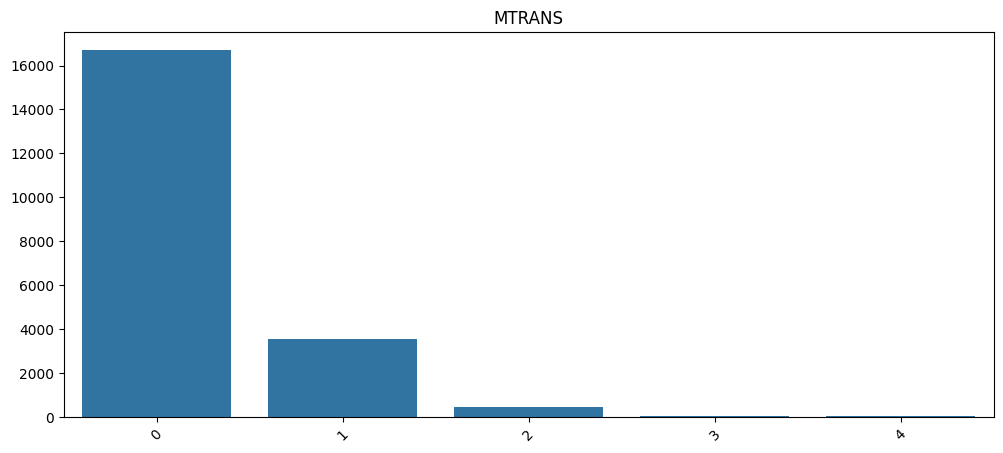

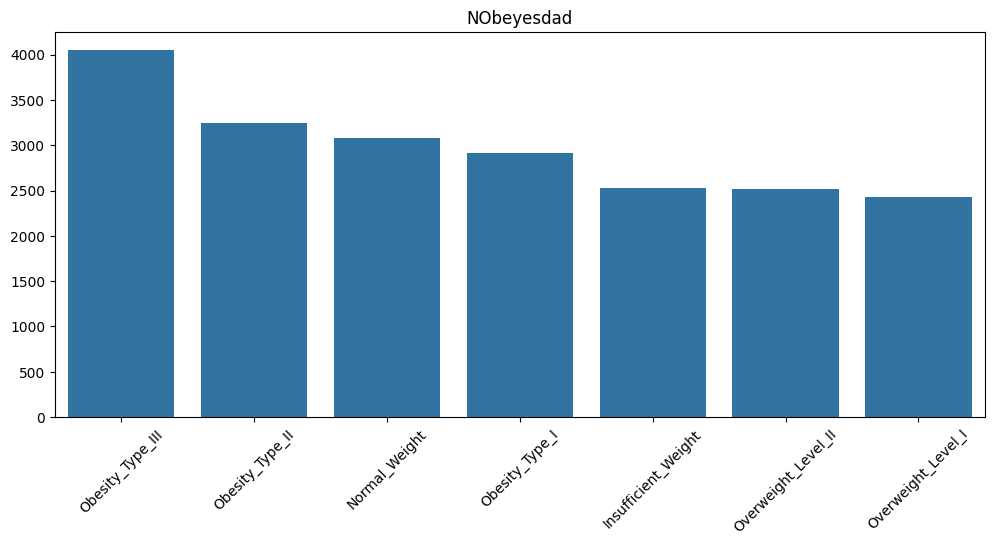

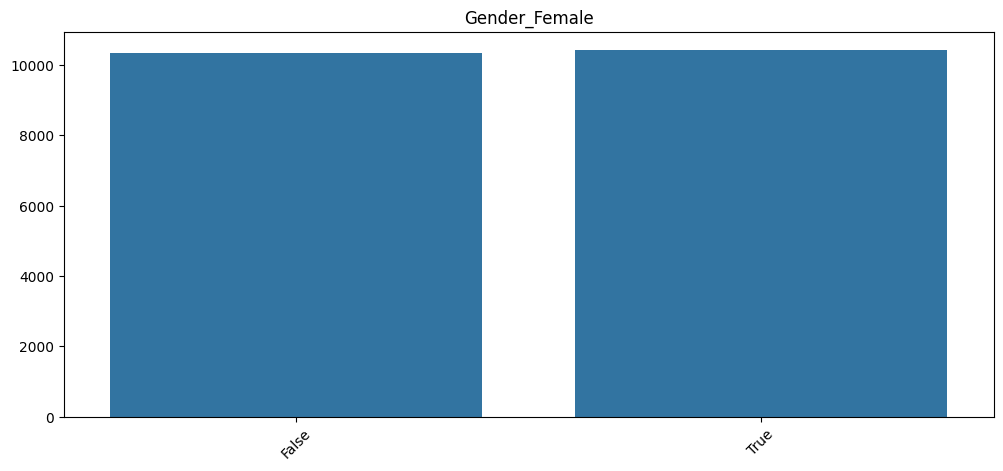

In [ ]:
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x = values, y = counts)

    plt.title(a)
    plt.xticks(rotation=45)
    print(a, values, counts)

# **Training the model**

In [ ]:
# Define features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
accuracy = model.score(X_test, y_test)
accuracy

0.8923410404624278

In [ ]:
param_range = np.arange(1, 101, 10)
rf_classifier = RandomForestClassifier()
# Calculate train and test scores for varying parameter values
train_scores, test_scores = validation_curve(
    estimator=rf_classifier,
    X=X,
    y=y,
    param_name="n_estimators",  # Parameter to optimize (e.g., number of trees)
    param_range=param_range,
    cv=5,  # Number of cross-validation folds
    scoring="accuracy",  # Scoring metric
    n_jobs=-1  # Use all available CPU cores for parallel execution
)

In [ ]:
# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

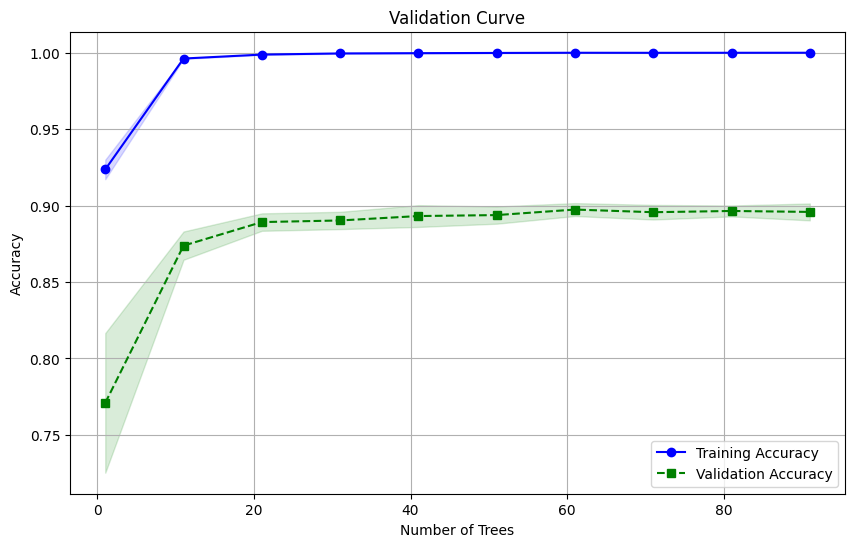

In [ ]:
# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color="blue", marker="o", label="Training Accuracy")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, color="green", linestyle="--", marker="s", label="Validation Accuracy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color="green")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Validation Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **Predicting obesity risk**

In [ ]:
pred = pd.DataFrame()
pred['id']=df_test['id'].astype(int)
pred['NObeyesdad'] = model.predict(df_test)
#pred.to_csv('submission.csv',index=False)
pred

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


# **saving the model**

In [ ]:

import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('model.pkl', 'rb') )